In [47]:
import pandas as pd
import numpy as np
import matplotlib as plt
from numpy import poly1d
df = pd.read_excel('pet-set.xlsx')
pd.set_option('display.max_columns', 1000)

In [48]:
df

,How old is your cat (years)?,How long have you owned your cat (years)?,Is your cat male or female?,Where did you get your cat from?,Other (please specify),Is your cat neutered?,What breed is your cat?,Other (please specify).1,Does your cat have access to the outdoors?,"If yes, does your cat have constant access, or is this restricted in some way (i.e. the cat is kept in at night or is only let out when someone is home)",Does your cat have a litter tray?,Does your cat have any existing medical conditions?,"If yes, what condition does he/she suffer from?",Was this condition present before you acquired your cat?,Does your cat display any behavioural problems,"If yes, what behavioural problem does he/she display?",Was this problem present before you acquired your cat?,Does your cat suffer from a urinary tract infection (e.g. cystitis)?,Does your cat urinate inside the house in a location other than the litter tray?,"Does your cat spray urine on any vertical surfaces (e.g. curtains, kitchen, cabinets, doors, walls)?",Does your cat defecate inside the house in a location other than the litter tray?,Does your cat vomit?,Does your cat suffer from diarrhoea?,Does your cat suffer from constipation?,How would you describe your cat's weight?,What is the condition of your cat's coat (1-poor condition - 5-excellent condition),My cat is keen to explore new things in his/her environment,My cat is playful,My cat is vocal when around people,"My cat behaves aggressively (i.e. growls, hisses, bites, swipes with claws) towards me when I perform routine health procedures (such as grooming/carrying out health checks, or when administering medication, etc.)","My cat tries to avoid me when I try to encourage interactions (i.e. when I call his/her name in a friendly voice, when I make kissing noises, or crouch down and offer it my fingers etc.)",My cat tries to avoid me when I go to stroke him/her or tickle his/her chin/cheeks,"When I initiate contact or interaction with my cat, he/she doesn't move away but it is quiet and not very responsive towards me (i.e. it doesn't purr or rub up against me)","My cat behaves aggressively (i.e. growls, hisses, bites and swipes with claws) towards me when I stroke him/her","My cat will come and say ""hello"" and approach me (i.e. the cat will approach and make physical contact with me), but will then wander off or move away shortly afterwards rather than staying for a long fuss","My cat comes and asks me for attention and initiates contact with me (e.g. the cat comes and sits on my knee, or rubs up against me and around me, in order to receive fuss/strokes/chin/cheek tickles)","My cat gets carried away during play, which has led me to being bitten or swiped",I avoid stroking or handling my cat because I feel that he/she doesn't want me to,"I avoid stroking my cat because I think he/she will behave aggressively towards me (i.e. growl, hiss, bite, swipe with claws)",My cat seems angry around me,My cat is more keen to interact with and be near me when I have food/treats,My cat is comfortable being picked up,My cat is timid,My cat is quick to settle and to adapt to change,"My cat would prefer to be left alone, rather than be with people",My cat likes being stroked,My cat is very tolerant to being handled,"If my cat could choose, it would prefer to have a bowl of food rather than interaction with me","My cat has negatively changed the way he/she interacts with me since I first acquired him/her (e.g. has become more fearful, behaves aggressively, is less friendly)","My cat has positively changed in the way he/she interacts with me since I first acquired him/her (e.g. has become less fearful, behaves less aggressively, is more friendly)",My cat behaves differently with strangers than he/she does with me,My cat behaves differently with me than he/she does with other (human) members of the household,My cat is friendly,My cat is fearful,My cat has met all my expectations,I am happy with my cat,I feel my cat is happy living w

In [95]:
hpyown_age = df.groupby(['Age'])

In [94]:
age1 = hpyown_age.get_group('18-24')
age2 = hpyown_age.get_group('25-34')
age3 = hpyown_age.get_group('35-44')
age4 = hpyown_age.get_group('45-54')
age5 = hpyown_age.get_group('55-64')
age6 = hpyown_age.get_group('65 and over')

In [38]:
df['My cat gets carried away during play, which has led me to being bitten or swiped'].value_counts()

Occasionally    1257
Never           1214
Once             499
Usually          282
Always            79
Name: My cat gets carried away during play, which has led me to being bitten or swiped, dtype: int64

In [78]:
#df['Age'].value_counts()
#df.loc[df['Age'] == '25-34 ', ['I am happy with my cat']].value_counts()
#df.loc[df['Age'] == '35-44', ['I am happy with my cat']].value_counts()
#df.loc[df['Age'] == '45-54 ', ['I am happy with my cat']].value_counts()
#df.loc[df['Age'] == '55-64', ['I am happy with my cat']].value_counts()
#df.loc[df['Age'] == '18-24 ', ['I am happy with my cat']].value_counts()
df.loc[df['Age'] == '65 and over', ['I am happy with my cat']].value_counts()

I am happy with my cat    
Strongly agree                97
Agree                         20
Neither agree nor disagree     1
Strongly disagree              1
dtype: int64

# Where did you get your cat from What breed is your cat

In [6]:
new_cat = pd.melt(
    df, 
    id_vars= ['Where did you get your cat from?', 'I am happy with my cat', 'Age', 'Gender', 'What breed is your cat?','Does your cat have access to the outdoors?' ]   
)

In [7]:
new_cat

,Where did you get your cat from?,I am happy with my cat,Age,Gender,What breed is your cat?,Does your cat have access to the outdoors?,variable,value
0,Other (please specify),Strongly agree,25-34,Female,Domestic short/long hair,Yes,How old is your cat (years)?,6
1,Rehoming centre,Strongly agree,25-34,Female,Domestic short/long hair,Yes,How old is your cat (years)?,2
2,Friend/neighbour,Strongly agree,18-24,Female,Domestic short/long hair,No,How old is your cat (years)?,5
3,Friend/neighbour,Strongly agree,18-24,Female,Domestic short/long hair,Yes,How old is your cat (years)?,4
4,Other (please specify),Strongly agree,25-34,Female,Domestic short/long hair,Yes,How old is your cat (years)?,3
...,...,...,...,...,...,...,...,...
329764,Other (please specify),Strongly agree,55-64,Female,Domestic short/long hair,No,i see myself as someone who...Is sophisticated...,Disagree a little
329765,Breeder,Strongly agree,45-54,Female,Other (please specify),Yes,i see myself as someone who...Is sophisticated...,Agree strongly
329766,Friend/neighbour,Strongly agree,18-24,Female,Domestic short/long hair,No,i see myself as someone who...Is sophisticated...,Agree strongly
329767,Other (please specify),Strongly agree,35-44,Female,Other (please specify),No,i see myself as someone who...Is sophisticated...,Agree a little


In [105]:
catchart = age1['Where did you get your cat from?'].value_counts()

<AxesSubplot:title={'center':'Cat Owners age distribution'}, ylabel='Age'>

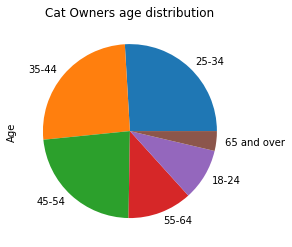

In [130]:
age_count = df['Age'].value_counts()
age_count.plot(kind='pie' , title='Cat Owners age distribution')

<AxesSubplot:title={'center':'Origin of cats owners  age distribution 25 -34'}, ylabel='.'>

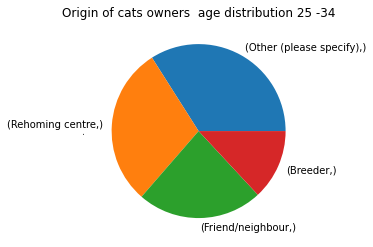

In [131]:
own_age = df.loc[df['Age'] == 
 '25-34', ['Where did you get your cat from?']]
aged2 = own_age.value_counts()
aged2.plot(kind='pie',title='Origin of cats owners  age distribution 25 -34' ,label= '.')

In [15]:
unhpy_own = df[['I am happy with my cat','Does your cat have any existing medical conditions?']]

<AxesSubplot:title={'center':'Satisfaction Distribution'}>

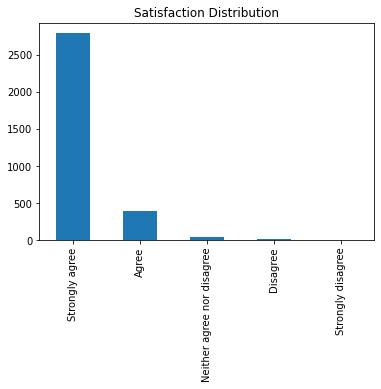

In [134]:
satyfct = unhpy_own['I am happy with my cat'].value_counts()
satyfct.plot(kind='bar',title='Satisfaction Distribution' ,label= '.')

In [30]:
unhpy_own['Does your cat have any existing medical conditions?'].value_counts()

No     2564
Yes     767
Name: Does your cat have any existing medical conditions?, dtype: int64

In [103]:
unhpy_age = df.loc[df['Age'] == 
 '55-64',['I am happy with my cat']]

In [104]:
unhpy_age['I am happy with my cat'].value_counts()

Strongly agree                322
Agree                          61
Neither agree nor disagree      3
Disagree                        2
Name: I am happy with my cat, dtype: int64